In [1]:
import numpy as np
import matplotlib.pyplot as plt

Clustering works well on Gaussians. So we will make some artifical data based on Gaussians.

In [2]:
# Create the 2D Gaussians. 
# len(params): # of clusters
# len(params[0]): # of features
# len(params[0][0]): mean and variance
params = [[[ 0,1],  [ 0,1]], 
          [[ 5,1],  [ 5,1]], 
          [[-2,1],  [ 2,1]],
          [[ 2,1],  [ 2,1]],
          [[-5,1],  [-5,1]]]

# Number of instances per cluster
n = 30
dims = len(params[0])

# Save the data and their associated labels
data = []
y = []
for ix, i in enumerate(params):
    inst = np.random.randn(n, dims)
    for dim in range(dims):
        inst[:,dim] = params[ix][dim][0]+params[ix][dim][1]*inst[:,dim]
        label = ix + np.zeros(n)
        
    if len(data) == 0: data = inst
    else: data = np.append( data, inst, axis= 0)
    if len(y) == 0: y = label
    else: y = np.append(y, label)
        
num_clusters = len(params)

print(y.shape)
print(data.shape)

(150,)
(150, 2)


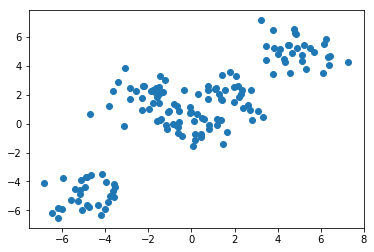

In [3]:
plt.scatter(data[:,0], data[:,1])
plt.show()

In [ ]:
class Kmeans(object):
    
    def __init__(self, k=1):
        self.k = k
        self.centroids = None
    
    ################################################
    ########## Training Methods ####################
    ################################################
    def init_centroids(self, data):
        """ We want to initialize k centroids. 
        
        We do not know the range of the data. If a centroid
        falls too far away from the data it will never be able 
        to move closer towards it associated cluster. Thus we want
        to go through the data and identify the range of its values
        for each dimension. 
        
        Args:
            - data
        """
        
        ###### CODE GOES HERE #####
        
        self.centroids = centroids
    
    def distance_to_centroids(self, data, centroids):
        """ Distance from each datapoint to each centroid.
        
        We want to identify the distance from each datapoint to
        each centroid.
        
        """
        
        ###### CODE GOES HERE #####
        
        return distances
    
    def update_centroids(self, data, labels):
        """ Find the update centroids
        
        Based on the centorid label associated for each dataset. 
        We will then find the center of all these datapoints and
        this will be the new centorid.
        
        """
        
        ###### CODE GOES HERE #####
        
        return new_centroids
    
    def train(self, data, verbose=1):
        """ Train the k-means algorithm
        
        Train the centroids to identify the clusters.
        """
        
        shape = data.shape
        
        # Initialize centroids.
        self.init_centroids(data)
        centroids = self.centroids 
        
        # Draw the initialize centroids.
        if verbose == 1:
            print('Centroids: ')
            print(centroids)
            plt.scatter(data[:,0], data[:,1])
            plt.scatter(centroids[:,0], centroids[:,1], c = 'r')
            plt.show()
        
        iteration = 0
        while iteration < 100:
            iteration += 1
            
            # Get the distance from each datapoint to each centroid
            distances = self.distance_to_centroids(data, centroids)
            # Identify the new label for each datapoint.
            labels = np.argmin(distances, axis = 1)
            # Get the new centroids
            new_centroids = self.update_centroids(data, labels)
            
            # Flag the error
            if new_centroids is None:
                return 0
            
            # Plot the data and the new centroids
            if verbose == 1:
                print('-----------------------------------------------')
                print('Iteration: ', iteration)
                plt.scatter(data[:,0], data[:,1], c = labels)
                plt.scatter(new_centroids[:,0], new_centroids[:,1], c = 'r')
                plt.show()
            
            # Verify convergence. If the centorids
            # are in the same place as the last then we are done.
            if np.linalg.norm(new_centroids - centroids) < np.finfo(float).eps:
                print("DONE!")
                break
                
            centroids = new_centroids
        
        # When we are done.
        # We will save the centroids and labels
        self.centroids = centroids
        self.labels = labels
        
        if verbose == 1:
            print(labels)
            print(centroids)
        return 1
    
    ################################################
    ########## Additional Methods ##################
    ################################################
    def getAverageDistance(self, data):
        dists = np.zeros((len(self.centroids),))
        for ix, centroid in enumerate(self.centroids):
            temp = data[self.labels == ix]
            dist = 0
            for i in temp:
                dist += np.linalg.norm(i - centroid)
            dists[ix] = dist/len(temp)
        return dists
    
    def getLabels(self):
        return self.labels